In [ ]:
# yolo : you only look once 
# ssd : single short detection 
# here we are using yolo3 : draknet 
# currently we having yolo 10 : version 
# here i will explain from very scratch 
# but yolo 10 has package available now : ultralytics
# cfg : con

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [35]:
modelconf = "yolov3-tiny.cfg"
modelWeights = "yolov3-tiny.weights"
net = cv2.dnn.readNetFromDarknet(modelconf,modelWeights)
net

< cv2.dnn.Net 00000283855DF8B0>

In [6]:
classfile = "coco.names"
file = open(classfile,'rt')
classes = file.read().rsplit('\n')
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush',
 '']

In [7]:
len(classes)

81

In [8]:
dir(net)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'connect',
 'dump',
 'dumpToFile',
 'empty',
 'enableFusion',
 'enableWinograd',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getInputDetails',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getOutputDetails',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'quantize',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputShape',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [16]:
l1 = net.getUnconnectedOutLayers()
l1

array([36, 48])

In [25]:
l1[35]

IndexError: index 35 is out of bounds for axis 0 with size 2

(576, 768, 3)


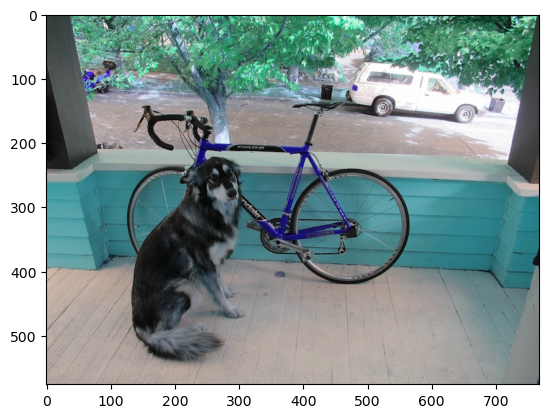

In [26]:
frame = cv2.imread('./images/dog.jpg')
plt.imshow(frame)
print(frame.shape)

In [27]:
# reshape the image
inpWidth = 416
inpHeight = 416
frame=cv2.imread('./images/dog.jpg')
# generally image will take as BGR we need to change RGB
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop = False) # pass the image

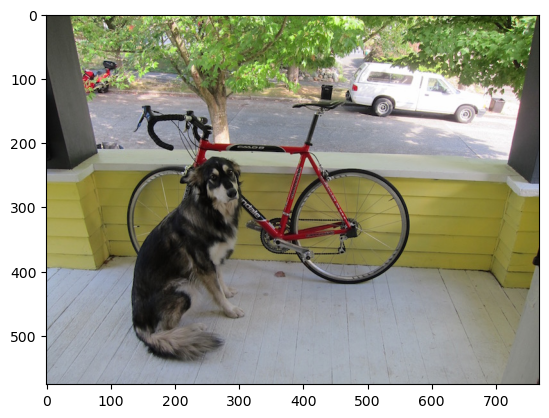

In [28]:
# Change BGR to RGB
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [29]:
frame.shape

(576, 768, 3)

In [30]:
blob.shape

(1, 3, 416, 416)

In [36]:
net.setInput(blob)

In [38]:
yolo_layer = net.getUnconnectedOutLayersNames()
outs = net.forward(yolo_layer)
outs

(array([[0.04629871, 0.04855701, 0.20454952, ..., 0.        , 0.        ,
         0.        ],
        [0.0369194 , 0.05203329, 0.148728  , ..., 0.        , 0.        ,
         0.        ],
        [0.0336024 , 0.04616932, 0.76369506, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9524836 , 0.96394104, 0.19116172, ..., 0.        , 0.        ,
         0.        ],
        [0.95709264, 0.95338875, 0.1868324 , ..., 0.        , 0.        ,
         0.        ],
        [0.9686857 , 0.9525847 , 0.79309213, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01915737, 0.01699536, 0.03062333, ..., 0.        , 0.        ,
         0.        ],
        [0.02472974, 0.02360387, 0.04224706, ..., 0.        , 0.        ,
         0.        ],
        [0.01501431, 0.01983077, 0.11940244, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97540367, 0.9773502 , 0.02305202, ..., 0.        , 0.        ,
         0.        

In [39]:
len(outs)

2

In [41]:
len(outs[0])

507

In [50]:
len(outs[0][506])

85

In [51]:
list(outs[0][0])[:5]

[0.046298705, 0.04855701, 0.20454952, 0.1712471, 5.5470878e-06]

In [52]:
frameHeight = frame.shape[0]
frameWidth = frame.shape[1]
boxes = []
confidences = []
class_IDs=[]
for out in outs:
    for dectection in out:
        score=dectection[5:]
        class_id=np.argmax(score)
        confidence = score[class_id]
        if confidence>0.70:
            print(dectection)
            centerX = int(dectection[0]*frameWidth)
            centerY = int(dectection[1]*frameHeight)
            width = int(dectection[2]*frameWidth)
            height = int(dectection[3]*frameHeight)
            left = int(centerX - width/2)
            top = int(centerY - height/2)
            class_IDs.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left,top,width,height])

boxes

[0.7506749  0.22071578 0.28650135 0.15503977 0.9590338  0.
 0.         0.7252457  0.         0.         0.         0.
 0.39470372 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.32989582 0.64003456 0.33577296 0.520143   0.83338046 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

[[466, 82, 220, 89], [124, 218, 257, 299]]

In [54]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
indexes  # surprass many boxes

array([1, 0])

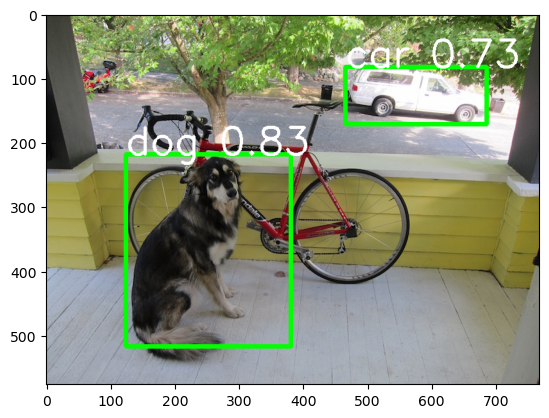

In [58]:
font=cv2.FONT_HERSHEY_SIMPLEX
color=(0,255,0) # RGB
for i in indexes:
    x,y,w,h=boxes[i]
    label=str(classes[class_IDs[i]])
    confi=str(round(confidences[i],2))
    #color=colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i)   # (x,y): left,top     (x+w,y+h): right,bottom
    cv2.putText(img,label +" "+confi,(x,y),font,2,(255,255,255),3)
plt.imshow(img)